# Burgers Equations

On part du notebook suivant [Burgers-Equation](https://github.com/nishantsule/Burgers-Equation/blob/master/BurgersEq_1D.ipynb).
On va utiliser modulus mais l'idée est de rajouter une contrainte paramétrique pour la viscosité nu. 
On obtient donc un modèle capable de prédire U pour un viscosité passée en paramètre.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define and calculate constants and parameters

def solve( u, nu, nx, nt, dx, dt):
    # Time stepping loop for solving the Viscid Burger's equation using finite differences
    for n in range(nt-1):
        u[1:nx-1, n+1] = (u[1:nx-1, n] + 
                          dt * (nu * (u[2:nx, n] - 2 * u[1:nx-1, n] + u[0:nx-2, n]) / dx**2
                          - 0.25 * (u[2:nx, n]**2 - u[0:nx-2, n]**2) / dx))

def get_u(nu):

    xmax = 5  # Total size 
    tmax = 2  # Total time

    nx = 200  # Number of spatial grid points
    dt = 0.001  # Temporal resolution
    print(xmax)
    x = np.linspace(0, xmax, nx)  # Position vector
    nt = int(tmax / dt)  #  Number of temporal grid points
    dt = tmax / nt  # Temporal resolution (re-calculate for consistancy)
    print(tmax, dt)
    dx = xmax / nx  # Spatial resolution
    t = np.linspace(0, tmax, nt)  # Vector containing time points
    u = np.zeros([nx, nt])  # Array containing velocity
    u[:, 0] = np.exp(-2 * (x - 0.5 * xmax)**2)  # Initial condition
    u[0, :] = 0  # Boundary condition at x=0
    u[nx-1, :] = 0  #  Boundary condition at x=xmax
    solve(u, nu, nx, nt, dx, dt)
    
    return u


In [3]:

#Viscosity
nu = 0.06  # enter a number between 0.003 and 0.3 (to maintain numerical stability)
u = get_u(nu)


5
2 0.001


2 0.001


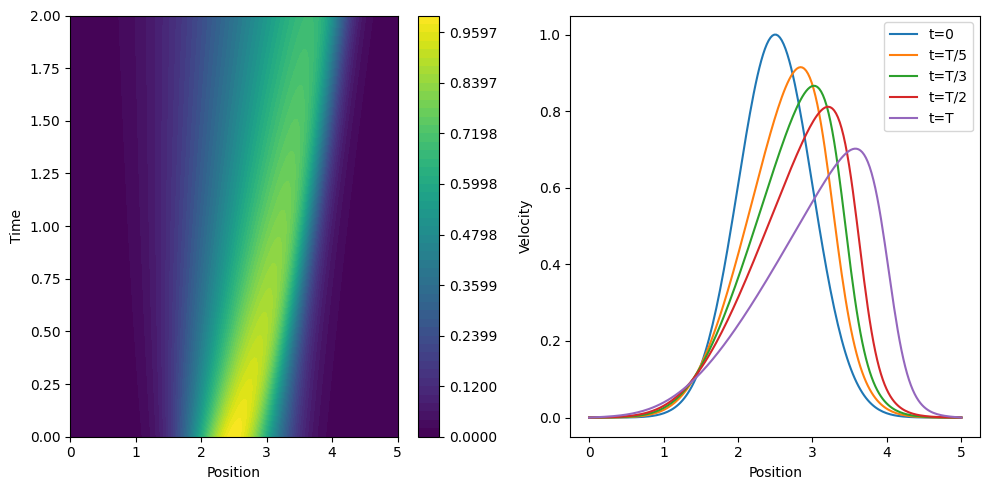

In [4]:
xmax = 5  # Total size 
tmax = 2  # Total time

nx = 200  # Number of spatial grid points
dt = 0.001  # Temporal resolution
x = np.linspace(0, xmax, nx)  # Position vector
nt = int(tmax / dt)  #  Number of temporal grid points
dt = tmax / nt  # Temporal resolution (re-calculate for consistancy)
print(tmax, dt)
dx = xmax / nx  # Spatial resolution
t = np.linspace(0, tmax, nt)  # Vector containing time points
# Select time points to plotting velocity vs position
timepoints = np.array([0, tmax / 5, tmax / 3, tmax / 2, tmax/1.1]) / dt
# Generate levels for contour plot
levels = np.arange(0, np.amax(u) + 0.01,  np.amax(u) / 50)
# Create figure
fig1, ax1 = plt.subplots(1, 2, figsize=(10, 5))
# Plot contour (velocity given by colorbar)
cf = ax1[0].contourf(x, t, u.T, levels=levels)
# Add colorbar
cbar = fig1.colorbar(cf, ax=ax1[0])
# Add labels
ax1[0].set_xlabel('Position')
ax1[0].set_ylabel('Time')
# Plot velocity vs position for 5 different time points
ax1[1].plot(x, u[:, int(timepoints[0])], label='t=0')
ax1[1].plot(x, u[:, int(timepoints[1])], label='t=T/5')
ax1[1].plot(x, u[:, int(timepoints[2])], label='t=T/3')
ax1[1].plot(x, u[:, int(timepoints[3])], label='t=T/2')
ax1[1].plot(x, u[:, int(timepoints[4])], label='t=T')
# Add labels
ax1[1].set_xlabel('Position')
ax1[1].set_ylabel('Velocity')
ax1[1].legend()
fig1.tight_layout()
# show figure
plt.show()

(200, 200)


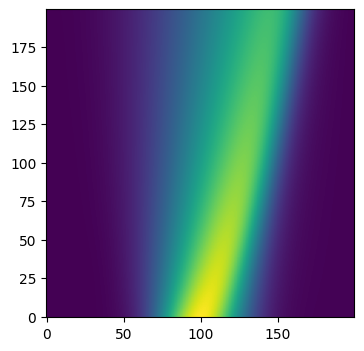

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 4))



network_dir = "../outputs/burger/inferencers/"
data_2 = np.load(network_dir + "inferencer_data.npz", allow_pickle=True)
d_dict = np.atleast_1d(data_2.f.arr_0)[0]
t = d_dict['t']
x = d_dict['x']
U = d_dict['U'].T.reshape([200, 200])
print(U.shape)
plt.imshow(U, origin='lower')
#plt.plot(data_1['t'], data_1['true_T'])
#plt.plot(d_dict['t'], d_dict['T'])
#data_2 = np.atleast_1d(data_2.f.arr_0)[0]